In [1]:
cd C:\Users\HP-15\Documents\bikedemand

C:\Users\HP-15\Documents\bikedemand


In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("train.csv")

In [4]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
dataset['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
5        2011-01-01 05:00:00
6        2011-01-01 06:00:00
7        2011-01-01 07:00:00
8        2011-01-01 08:00:00
9        2011-01-01 09:00:00
10       2011-01-01 10:00:00
11       2011-01-01 11:00:00
12       2011-01-01 12:00:00
13       2011-01-01 13:00:00
14       2011-01-01 14:00:00
15       2011-01-01 15:00:00
16       2011-01-01 16:00:00
17       2011-01-01 17:00:00
18       2011-01-01 18:00:00
19       2011-01-01 19:00:00
20       2011-01-01 20:00:00
21       2011-01-01 21:00:00
22       2011-01-01 22:00:00
23       2011-01-01 23:00:00
24       2011-01-02 00:00:00
25       2011-01-02 01:00:00
26       2011-01-02 02:00:00
27       2011-01-02 03:00:00
28       2011-01-02 04:00:00
29       2011-01-02 06:00:00
                ...         
10856    2012-12-18 18:00:00
10857    2012-12-18 19:00:00
10858    2012-12-18 20:00:00
10859    2012-

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from datetime import datetime
help(datetime.strptime)


Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



In [26]:
def parse(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dataset = pd.read_csv('train.csv',  parse_dates = ['datetime'], index_col=0, date_parser=parse)

In [27]:
dataset.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

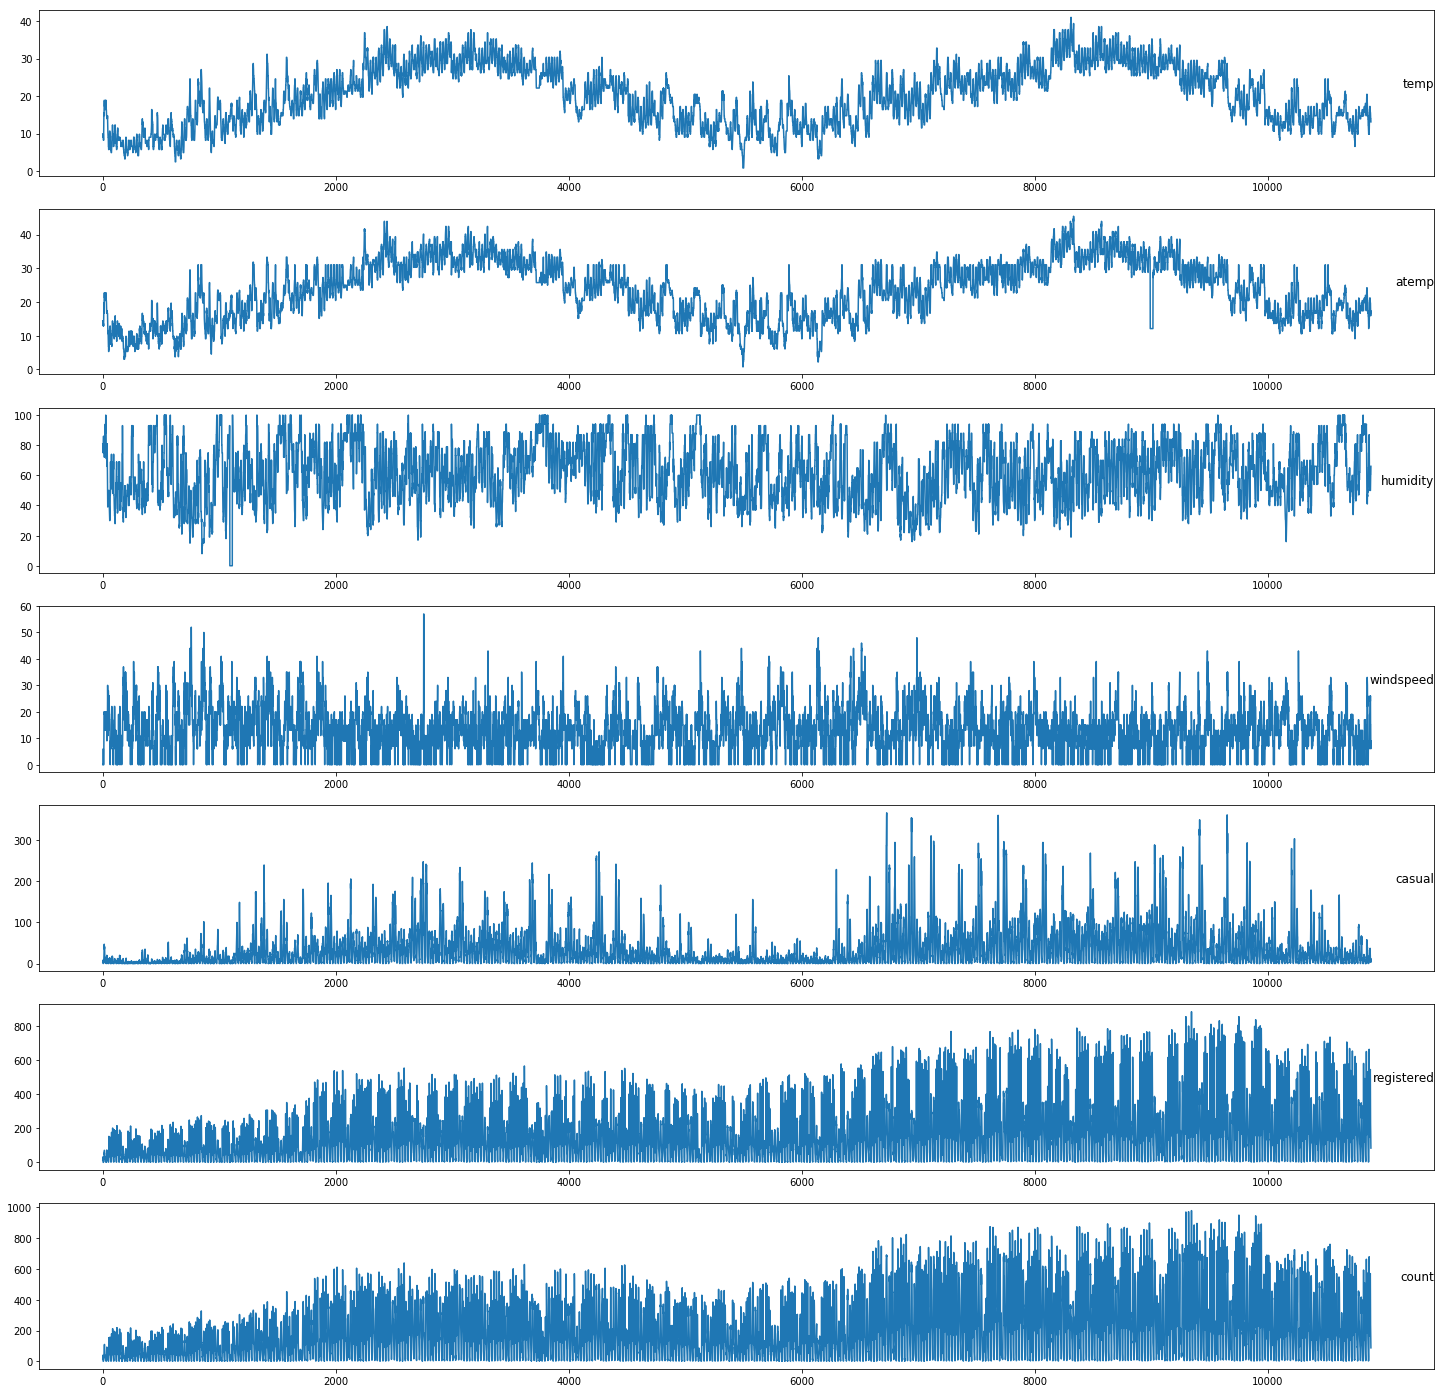

In [45]:
groups=list(range(4,11))
plt.figure(figsize=(25,25))
i=1
values=dataset.values
for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(dataset.columns[group],loc='right',y=.5)
    i +=1
plt.show()    
    


In [52]:
dataset=pd.read_csv("train.csv")

In [11]:
dailyData=dataset

In [14]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

In [19]:
dailyData.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

In [21]:
dailyData.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [15]:
dailyData.drop(['datetime'],axis=1,inplace=True)

In [62]:
dailyData.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


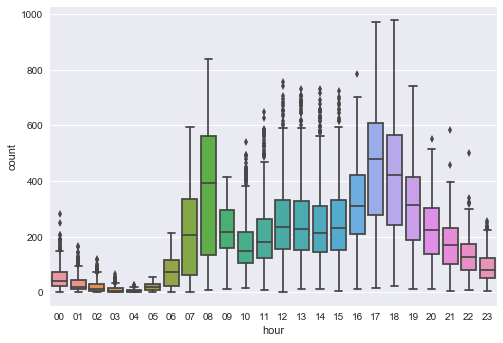

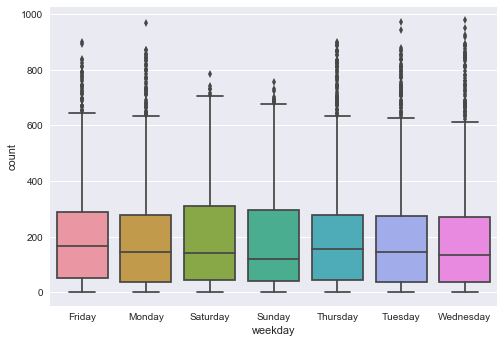

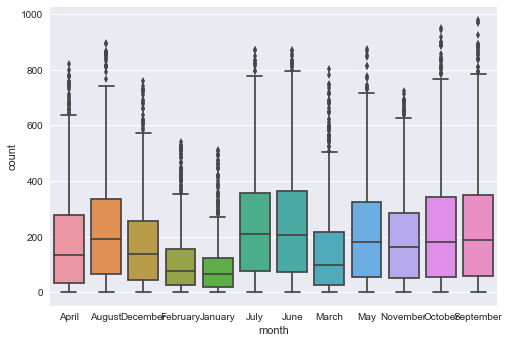

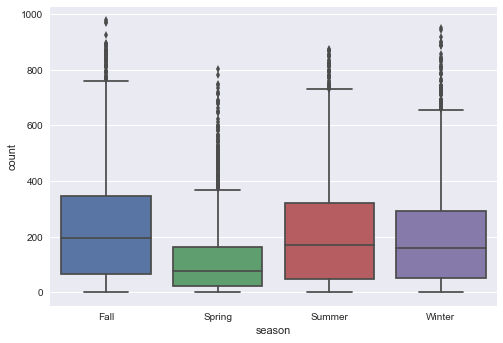

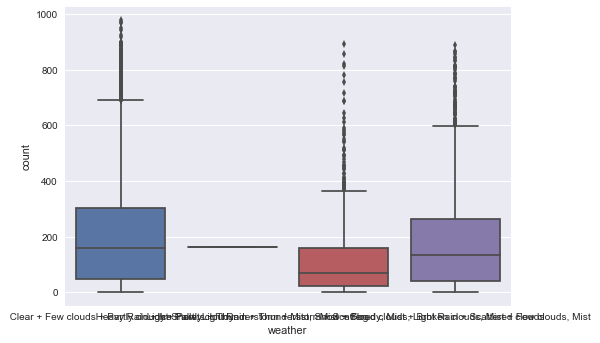

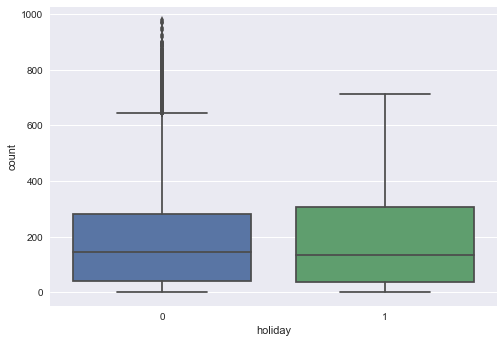

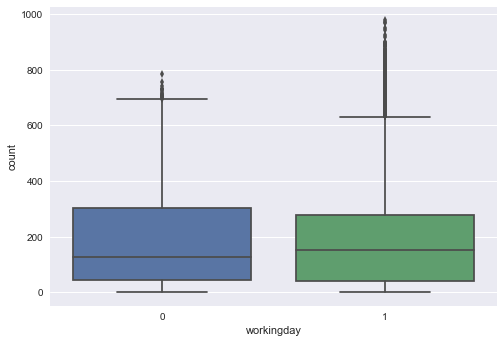

In [13]:
c=len(dailyData.columns)
import seaborn as sns
cols=dailyData.columns[:c-1]
r=[]
for col in categoryVariableList:
    v=sns.boxplot(data=dailyData,x=col,y="count")
    plt.show()
    r.append([col,v])


    

In [29]:
np.unique(dailyData.weather)

array([' Clear + Few clouds + Partly cloudy + Partly cloudy',
       ' Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ',
       ' Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       ' Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist '], dtype=object)

In [26]:
dailyData.groupby(['weather']).count()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
weather,,,,,,,,,,,,,,,
Clear + Few clouds + Partly cloudy + Partly cloudy,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",859,859,859,859,859,859,859,859,859,859,859,859,859,859,859
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834


In [76]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

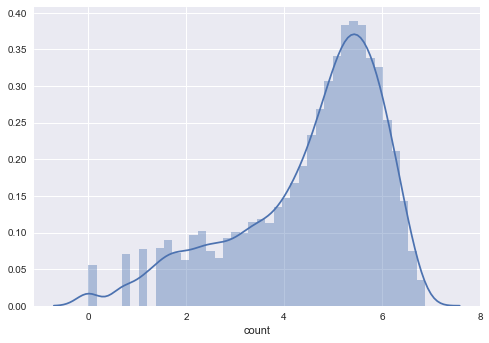

In [104]:
import math
sns.distplot(np.log(dailyData['count']))

In [103]:
np.log(dailyData['count'])

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
5        0.000000
6        0.693147
7        1.098612
8        2.079442
9        2.639057
10       3.583519
11       4.025352
12       4.430817
13       4.543295
14       4.663439
15       4.700480
16       4.532599
17       4.204693
18       3.555348
19       3.610918
20       3.583519
21       3.526361
22       3.332205
23       3.663562
24       2.833213
25       2.833213
26       2.197225
27       1.791759
28       1.098612
29       0.693147
           ...   
10856    6.263398
10857    5.866468
10858    5.590987
10859    5.123964
10860    4.882802
10861    4.394449
10862    3.713572
10863    2.708050
10864    1.098612
10865    1.609438
10866    1.945910
10867    3.433987
10868    4.718499
10869    5.894403
10870    6.519147
10871    5.758902
10872    5.099866
10873    5.298317
10874    5.463832
10875    5.361292
10876    5.384495
10877    5.468060
10878    5.811141
10879    6.331502
10880    6

In [14]:
dailyData=dataset

In [105]:
dailyData.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'hour', 'weekday', 'month'],
      dtype='object')

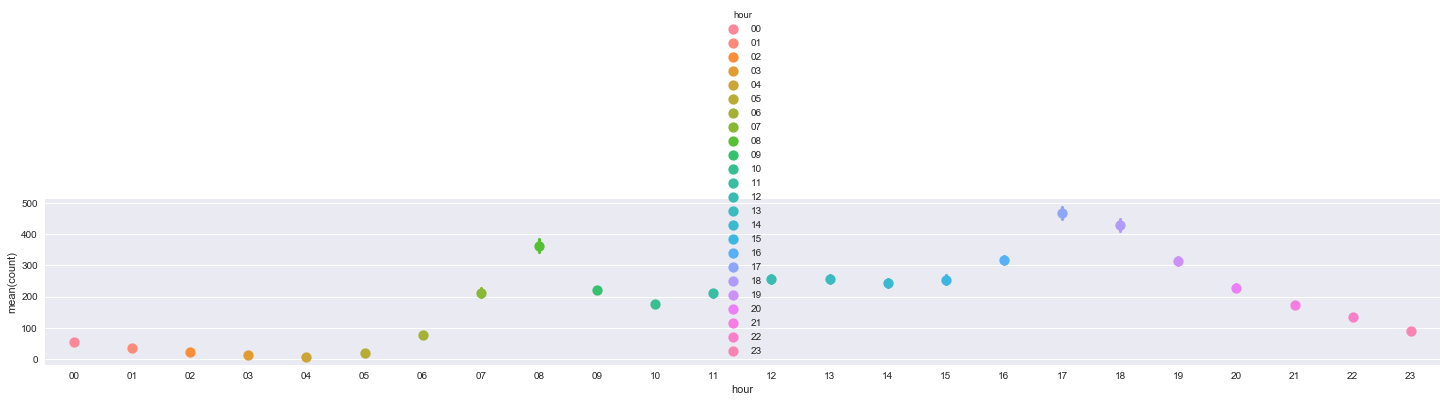

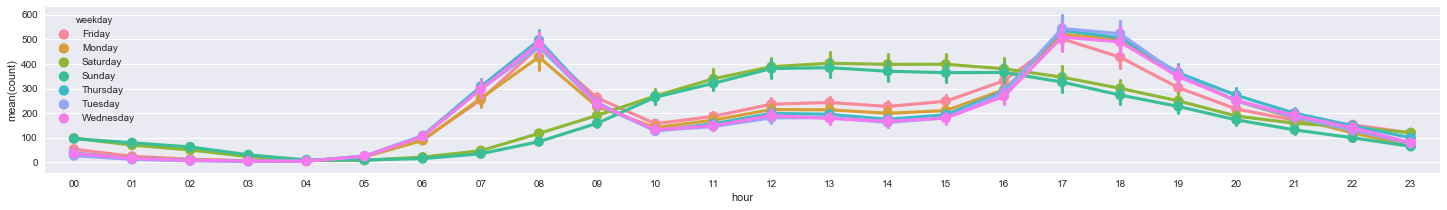

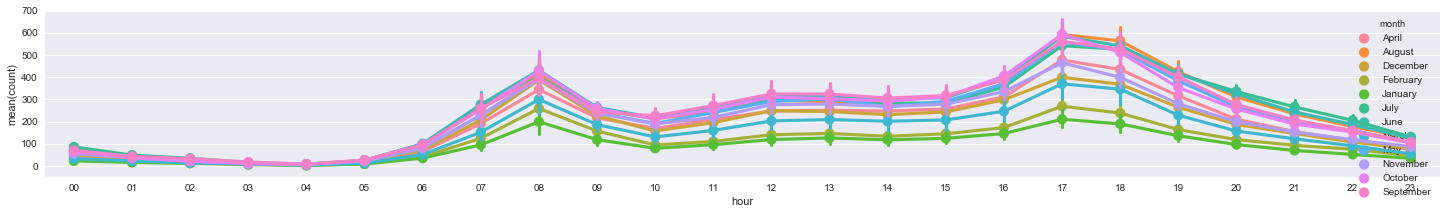

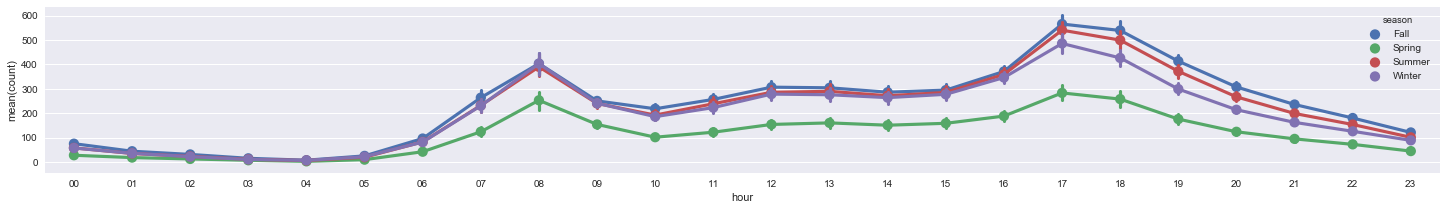

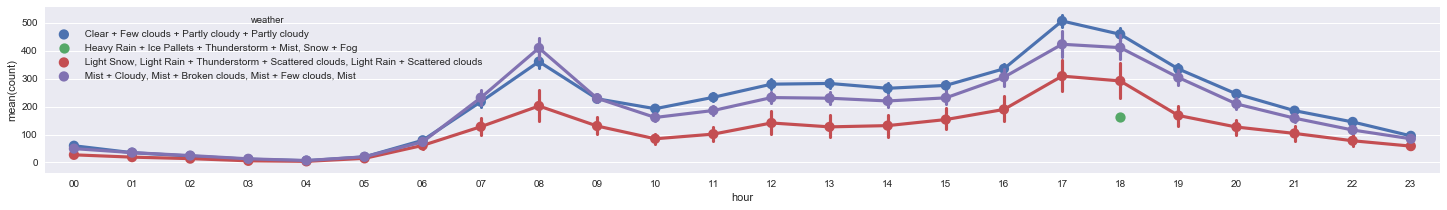

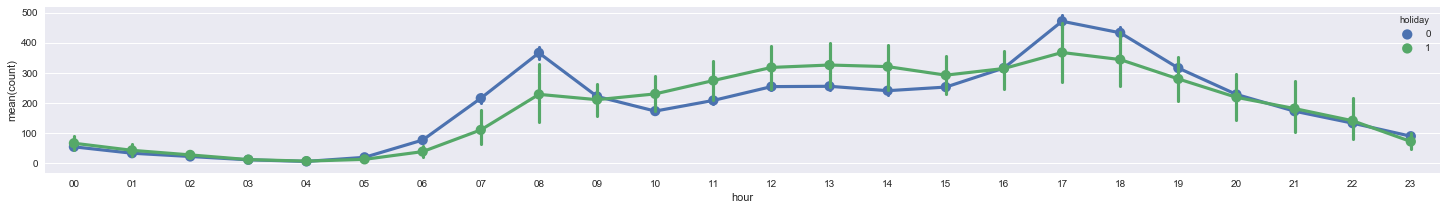

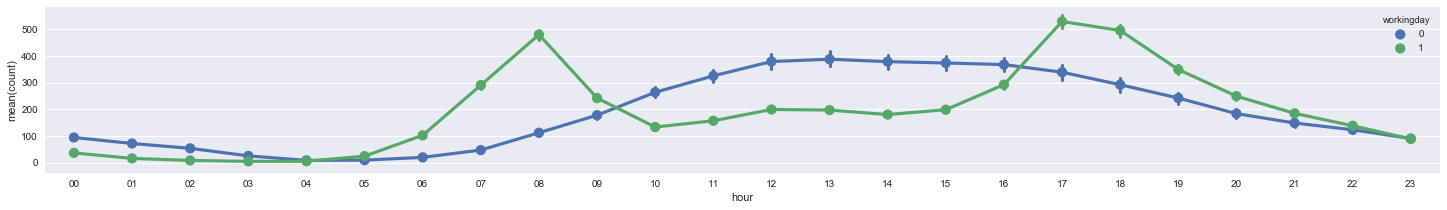

In [112]:
i=1
for col in categoryVariableList:
    plt.figure(figsize=(25,25))
    plt.subplot(7,1,i)
    sns.pointplot(x='hour',y='count',hue=col,data=dailyData)
    i+=1
    plt.show()

In [9]:
a=categoryVariableList+continousVariables_new
a

NameError: name 'categoryVariableList' is not defined

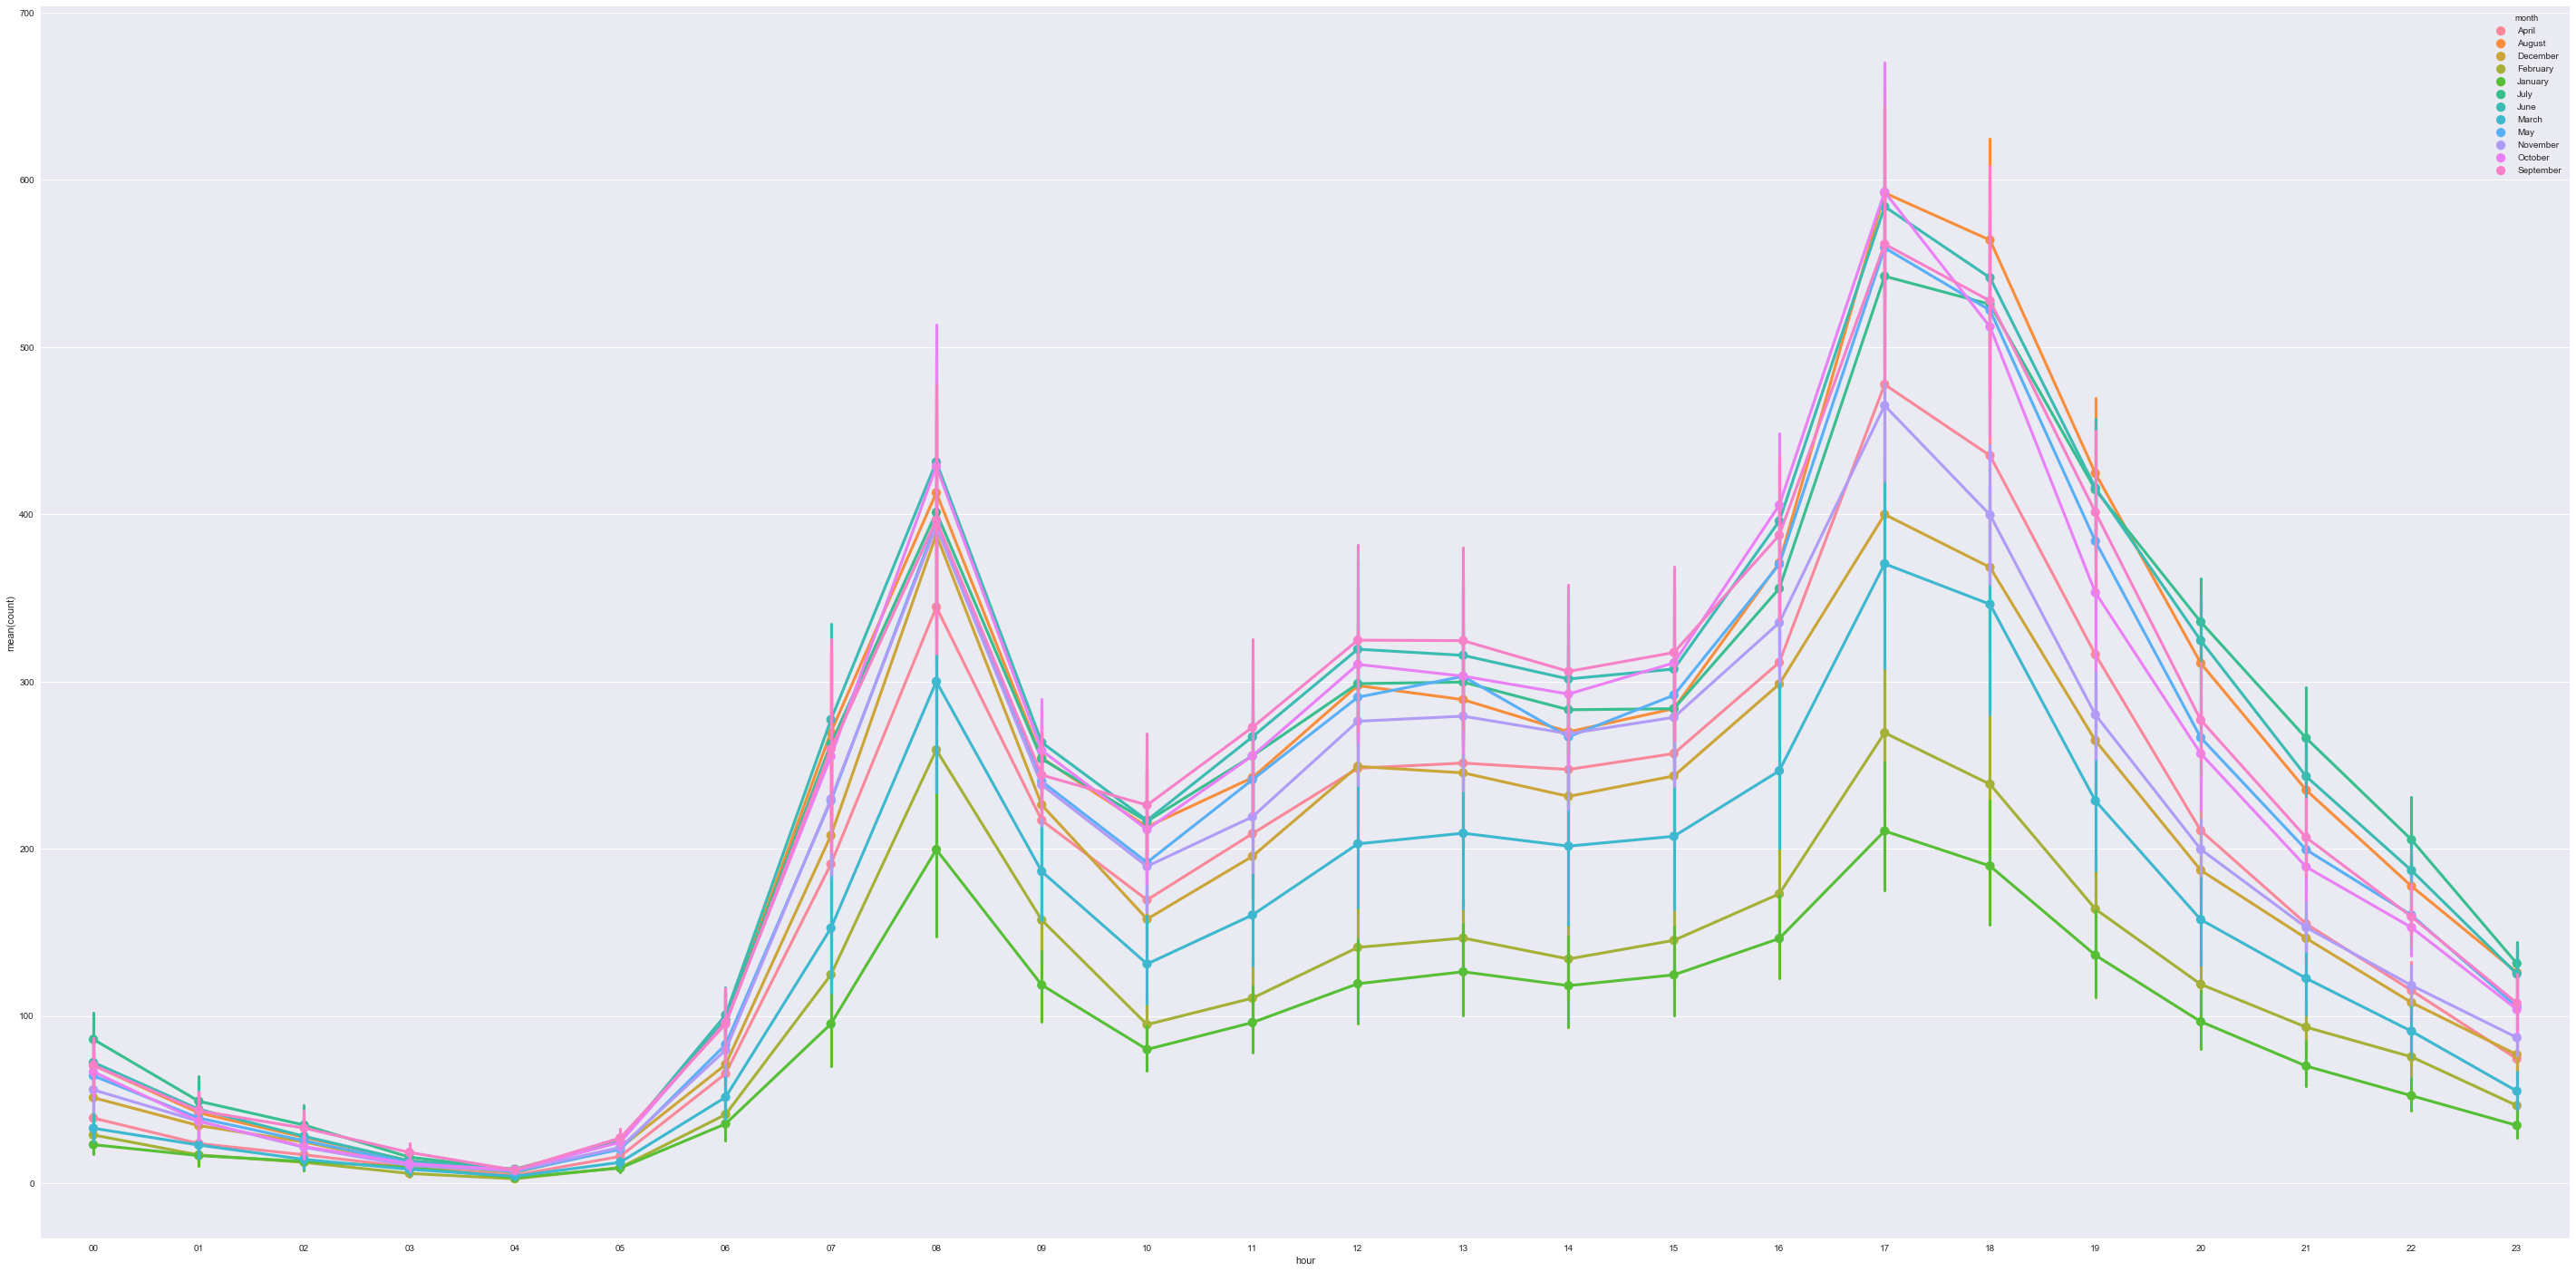

In [22]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(50,25))
sns.pointplot(x='hour',y='count',hue='month',data=dailyData)
import numpy as np
import seaborn as sns

In [8]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y=np.exp(y)
        y_=np.exp(y_)
    log1=np.nan_to_num(np.array([np.log(v+1)for v in y]))
    log2=np.nan_to_num(np.array([np.log(v+1)for v in y_]))
    calc = (log1-log2)**2
    return np.sqrt(np.mean(calc))

In [26]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
lmodel=LinearRegression()
lmodel.fit(X,Y)
y_predict=lmodel.predict(X)
print("traing error rmsle:%.6f"%(rmsle(y_predict,Y)))
y_p=lmodel.predict(X_val_con)
print("test error rmsle:%.6f"%(rmsle(y_p,Y_val)))

traing error rmsle:1.041255
test error rmsle:2.423688


In [30]:
import numpy as np

In [17]:
data=pd.read_csv("train.csv")

In [18]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [9]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
hour            int32
year           object
weekday         int64
month           int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dailyData['code']=lb.fit_transform(dailyData['season'])

In [22]:
dailyData['season'].dtype

category

In [19]:
for vars in categoryVariableList:
    data[vars]=data[vars].astype('category')

In [21]:
X_all=[]
Dataset=data.values
val_size = 0.3
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
continousVariables_new=['temp' ,'humidity','windspeed']
target=['count']
remove=['atemp','casual','registered','date']
Y=np.log(data['count'].values)
X=data[categoryVariableList+continousVariables_new].values
#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
size=len(categoryVariableList)
#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
from sklearn.preprocessing import StandardScaler
X_temp=StandardScaler().fit_transform(X_train[:,size:])
X_val_temp=StandardScaler().fit_transform(X_val[:,size:])
X_con = np.concatenate((X_temp,X_train[:,0:size]),axis=1)
X_val_con = np.concatenate((X_val_temp,X_val[:,0:size]),axis=1)
X_all.append(['orig','All', X_train,X_val])
X_all.append(['StdScale','All', X_con,X_val_con])

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
rmsle_score=metrics.make_scorer(rmsle,greater_is_better=False)
params={"alpha":[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000],'max_iter':[3000]}
Rmodel=Ridge()
gs,Bestmodel=cv_optimize(Rmodel,params,X,Y,X_val,Y_val,score_func=rmsle_score)


c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'alpha': 1000, 'max_iter': 3000} -1.09574605433 [mean: -1.09748, std: 0.05171, params: {'alpha': 0.1, 'max_iter': 3000}, mean: -1.09748, std: 0.05172, params: {'alpha': 1, 'max_iter': 3000}, mean: -1.09747, std: 0.05172, params: {'alpha': 2, 'max_iter': 3000}, mean: -1.09747, std: 0.05172, params: {'alpha': 3, 'max_iter': 3000}, mean: -1.09746, std: 0.05172, params: {'alpha': 4, 'max_iter': 3000}, mean: -1.09744, std: 0.05173, params: {'alpha': 10, 'max_iter': 3000}, mean: -1.09735, std: 0.05175, params: {'alpha': 30, 'max_iter': 3000}, mean: -1.09710, std: 0.05179, params: {'alpha': 100, 'max_iter': 3000}, mean: -1.09683, std: 0.05182, params: {'alpha': 200, 'max_iter': 3000}, mean: -1.09662, std: 0.05183, params: {'alpha': 300, 'max_iter': 3000}, mean: -1.09644, std: 0.05183, params: {'alpha': 400, 'max_iter': 3000}, mean: -1.09593, std: 0.05181, params: {'alpha': 800, 'max_iter': 3000}, mean: -1.09584, std: 0.05180, params: {'alpha': 900, 'max_iter': 3000}, mean: -1.09575, std

In [1]:
def cv_optimize(clf, parameters, X_train, Y_train,X_val,Y_val,n_jobs=-1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=-1, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=-1, cv=n_folds)
    gs.fit(X_train,Y_train)
    print ("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)
    clf= gs.best_estimator_

    y_p=clf.predict(X_train)
    print("test error rmsle:%.6f"%(rmsle(y_p,Y_train)))
    print ("############# based on standard predict ################")
    
    print("test error rmsle:%.6f"%(rmsle(y_p,Y_train)))
    print ("########################################################")
    models=[gs,clf]
    return models

In [62]:
gs.cv_results_

{'mean_fit_time': array([ 0.0335186 ,  0.02551212,  0.0276196 ,  0.02481256,  0.02371383,
         0.0244226 ,  0.02332392,  0.02551336,  0.02021065,  0.01961498,
         0.01640334,  0.01641741,  0.01671233,  0.01462545]),
 'mean_score_time': array([ 0.04974256,  0.03292322,  0.03792825,  0.03322635,  0.03572979,
         0.03852124,  0.03241501,  0.03202119,  0.02601705,  0.02702603,
         0.0211185 ,  0.02350802,  0.02001433,  0.02340488]),
 'mean_test_score': array([-1.0419991 , -1.04199597, -1.04199255, -1.04198918, -1.04198586,
        -1.04196698, -1.04191438, -1.04180332, -1.0417481 , -1.04176788,
        -1.04184419, -1.04255788, -1.04281438, -1.04309524]),
 'mean_train_score': array([-1.03984003, -1.0398394 , -1.03983871, -1.03983805, -1.03983741,
        -1.03983393, -1.03982607, -1.03982691, -1.03987951, -1.03998063,
        -1.0401238 , -1.04103109, -1.04132485, -1.04164   ]),
 'param_alpha': masked_array(data = [0.1 1 2 3 4 10 30 100 200 300 400 800 900 1000],
       

In [72]:
Rmodel=Ridge()
gs = GridSearchCV(Rmodel, param_grid=params, cv=5, n_jobs=1, scoring=rmsle_score)
gs.fit(X_con,Y_train)
print(gs.best_params_,gs.best_score_)
y_p=gs.predict(X_con)
rmsle(y_p,Y_train)

{'max_iter': 3000, 'alpha': 200} -1.04174810365


1.0400848325776928

In [80]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000,2000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

grid_ridge_m.fit(X_all[0][2],Y_train)
preds = grid_ridge_m.predict(X=X_all[0][2])
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))

{'max_iter': 3000, 'alpha': 2000}
RMSLE Value For Ridge Regression:  1.040090413


c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


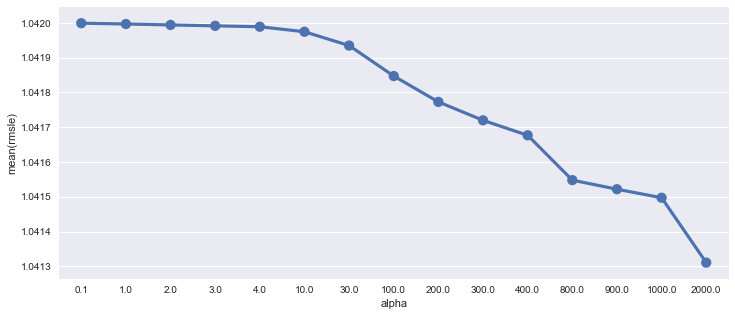

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [43]:
Lmodel=Lasso()
lasso_params_ = { 'max_iter':[3000],'alpha':a}
gs,Bestmodel=cv_optimize(Lmodel,lasso_params_,X_train,Y_train,X_val,Y_val,score_func=rmsle_score)

BEST {'max_iter': 3000, 'alpha': 0.033333333333333333} -1.04103104009 [mean: -1.41854, std: 0.01647, params: {'max_iter': 3000, 'alpha': 10.0}, mean: -1.07127, std: 0.02207, params: {'max_iter': 3000, 'alpha': 1.0}, mean: -1.05149, std: 0.02233, params: {'max_iter': 3000, 'alpha': 0.5}, mean: -1.04538, std: 0.02156, params: {'max_iter': 3000, 'alpha': 0.33333333333333331}, mean: -1.04339, std: 0.02115, params: {'max_iter': 3000, 'alpha': 0.25}, mean: -1.04162, std: 0.02036, params: {'max_iter': 3000, 'alpha': 0.10000000000000001}, mean: -1.04103, std: 0.02012, params: {'max_iter': 3000, 'alpha': 0.033333333333333333}, mean: -1.04111, std: 0.02008, params: {'max_iter': 3000, 'alpha': 0.01}, mean: -1.04134, std: 0.02008, params: {'max_iter': 3000, 'alpha': 0.0050000000000000001}, mean: -1.04151, std: 0.02009, params: {'max_iter': 3000, 'alpha': 0.0033333333333333335}, mean: -1.04163, std: 0.02008, params: {'max_iter': 3000, 'alpha': 0.0025000000000000001}, mean: -1.04181, std: 0.02007, p

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


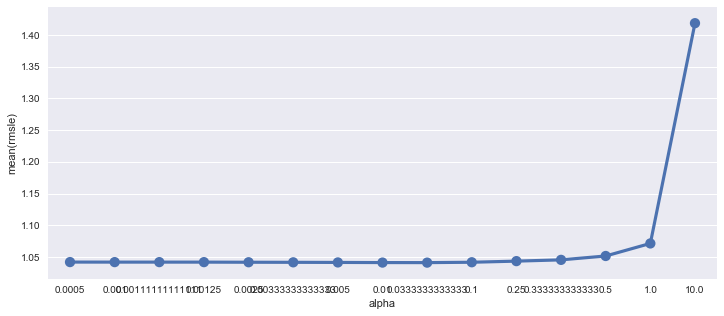

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(gs.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [38]:
alpha=np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000,2000])

In [39]:
a=1/alpha

In [40]:
a

array([  1.00000000e+01,   1.00000000e+00,   5.00000000e-01,
         3.33333333e-01,   2.50000000e-01,   1.00000000e-01,
         3.33333333e-02,   1.00000000e-02,   5.00000000e-03,
         3.33333333e-03,   2.50000000e-03,   1.25000000e-03,
         1.11111111e-03,   1.00000000e-03,   5.00000000e-04])

In [78]:

data.columns
data.drop('date',axis=1,inplace=True)
data.drop('datetime',axis=1,inplace=True)
data.drop('atemp',axis=1,inplace=True)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour',
       'year', 'weekday', 'month'],
      dtype='object')

In [108]:

data_0=data[data['windspeed']==0]
data_not0=data[data['windspeed']!=0]
from sklearn.ensemble import RandomForestRegressor
windColumns = ["season","weather","humidity","month","temp","year"]
model=RandomForestRegressor(n_estimators=100)
ytrain=data_not0['windspeed'].values
yval=data_0['windspeed'].values
xtrain=data_not0[windColumns].values
xval=data_0[windColumns].values
model.fit(xtrain,ytrain)
p=model.predict(xval)
data_0['windspeed']=p
data_not0.append(data_0)

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,year,weekday,month
5,1,0,0,2,9.84,75,6.003200,0,1,1,5,2011,5,1
10,1,0,0,1,15.58,76,16.997900,12,24,36,10,2011,5,1
11,1,0,0,1,14.76,81,19.001200,26,30,56,11,2011,5,1
12,1,0,0,1,17.22,77,19.001200,29,55,84,12,2011,5,1
13,1,0,0,2,18.86,72,19.999500,47,47,94,13,2011,5,1
14,1,0,0,2,18.86,72,19.001200,35,71,106,14,2011,5,1
15,1,0,0,2,18.04,77,19.999500,40,70,110,15,2011,5,1
16,1,0,0,2,17.22,82,19.999500,41,52,93,16,2011,5,1
17,1,0,0,2,18.04,82,19.001200,15,52,67,17,2011,5,1
18,1,0,0,3,17.22,88,16.997900,9,26,35,18,2011,5,1


In [109]:
X_all=[]
Dataset=data_not0.values
val_size = 0.3
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
continousVariables_new=['temp' ,'humidity','windspeed']
target=['count']
remove=['atemp','casual','registered','date']
Y=np.log(data_not0['count'].values)
X=data_not0[categoryVariableList+continousVariables_new].values
#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
size=len(categoryVariableList)
#Split the data into chunks
from sklearn import cross_validation
X_train1, X_val1, Y_train1, Y_val1 = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
from sklearn.preprocessing import StandardScaler
X_temp=StandardScaler().fit_transform(X_train1[:,size:])
X_val_temp=StandardScaler().fit_transform(X_val1[:,size:])
X_con1 = np.concatenate((X_temp,X_train1[:,0:size]),axis=1)
X_val_con1 = np.concatenate((X_val_temp,X_val1[:,0:size]),axis=1)
X_all.append(['orig','All', X_train,X_val])
X_all.append(['StdScale','All', X_con,X_val_con])


c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [58]:
np.array(data.columns)

array(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'hour', 'year', 'weekday', 'month'], dtype=object)

In [124]:
##after subsitutind 0's in windspeed with random forest 
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000,2000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

grid_ridge_m.fit(X_train2,Y_train2)
preds = grid_ridge_m.predict(X=X_val2)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_val2))

{'max_iter': 3000, 'alpha': 2000}
RMSLE Value For Ridge Regression:  1.04465942902


In [126]:
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
from sklearn.ensemble import RandomForestRegressor

for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]




dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]


dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RMSLE Value For Linear Regression:  0.977967214422


In [123]:
Y=np.log(data['count'].values)
X=data[categoryVariableList+continousVariables_new].values
X_train2, X_val2, Y_train2, Y_val2 = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

In [31]:
data.columns
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
from sklearn.ensemble import RandomForestRegressor

for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")data.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
year            object
weekday       category
month         category
dtype: object

In [5]:
import numpy as np
from datetime import datetime
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)
from sklearn.ensemble import RandomForestRegressor
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")
    
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])

X_all=[]
Dataset_t=dataTrain.values
dataset_test=dataTest.values
val_size = 0.3
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
continousVariables_new=['temp' ,'humidity','windspeed']
target=['count']
remove=['atemp','casual','registered','date']
Y_train=np.log(dataTrain['count'].values)
X_train=dataTrain[categoryVariableList+continousVariables_new].values
y_test=np.log(dataTest['count'].values)
X_test=dataTest[categoryVariableList+continousVariables_new].values

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
size=len(categoryVariableList)
#Split the data into chunks
from sklearn.preprocessing import StandardScaler


In [6]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
model.fit(X_train[:,size:])
X_temp=model.transform(X_train[:,size:])
print(model.mean_)
X_ts=model.transform(X_test[:,size:])
print(model.mean_)
X_con = np.concatenate((X_temp,X_train[:,0:size]),axis=1)
X_test_con = np.concatenate((X_ts,X_test[:,0:size]),axis=1)
X_all.append(['orig','All', X_train,X_test])
X_all.append(['StdScale','All', X_con,X_test_con])

[ 20.23085982  61.88645967  12.79939541]
[ 20.23085982  61.88645967  12.79939541]


c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [41]:
np.mean(X_temp,axis=0)

array([  3.13301960e-16,   1.14877385e-16,  -5.22169933e-17])

In [44]:
model.mean_

array([ 20.23085982,  61.88645967,  12.79939541])

In [19]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
lmodel=LinearRegression()
lmodel.fit(X_con,Y_train)
y_predict=lmodel.predict(X_con)
print("traing error rmsle:%.6f"%(rmsle(y_predict,Y_train)))


traing error rmsle:1.041255


In [53]:

ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000,2000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

grid_ridge_m.fit(X_train,Y_train)
preds = grid_ridge_m.predict(X=X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))

{'alpha': 2000, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  1.04127135365


In [48]:
X_train

array([[0, 5, 1, ..., 9.84, 81, 0.0],
       [1, 5, 1, ..., 9.02, 80, 0.0],
       [2, 5, 1, ..., 9.02, 80, 0.0],
       ..., 
       [21, 2, 12, ..., 13.94, 61, 15.0013],
       [22, 2, 12, ..., 13.94, 61, 6.0032],
       [23, 2, 12, ..., 13.12, 66, 8.9981]], dtype=object)

In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestRegressor(n_estimators=300)
model.fit(X_train,Y_train)
preds=model.predict(X_train)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))


RMSLE Value For Ridge Regression:  0.135048787748


In [61]:
model=RandomForestRegressor(n_estimators=100)
params={'n_estimators':[100],'max_features':['sqrt',.25,.75,5,7,4,8]}
gs,Bestmodel=cv_optimize(model,params,X_train,Y_train,X_val,Y_val,score_func=rmsle_score)
preds=Bestmodel.predict(X_train)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'n_estimators': 100, 'max_features': 7} -0.567648132672 [mean: -0.60043, std: 0.10942, params: {'n_estimators': 100, 'max_features': 'sqrt'}, mean: -0.59700, std: 0.10844, params: {'n_estimators': 300, 'max_features': 'sqrt'}, mean: -0.64105, std: 0.10123, params: {'n_estimators': 100, 'max_features': 0.25}, mean: -0.63595, std: 0.09925, params: {'n_estimators': 300, 'max_features': 0.25}, mean: -0.56954, std: 0.11079, params: {'n_estimators': 100, 'max_features': 0.75}, mean: -0.56802, std: 0.11164, params: {'n_estimators': 300, 'max_features': 0.75}, mean: -0.57152, std: 0.11105, params: {'n_estimators': 100, 'max_features': 5}, mean: -0.57093, std: 0.11237, params: {'n_estimators': 300, 'max_features': 5}, mean: -0.56765, std: 0.11100, params: {'n_estimators': 100, 'max_features': 7}, mean: -0.56862, std: 0.11205, params: {'n_estimators': 300, 'max_features': 7}]
test error rmsle:0.134355
############# based on standard predict ################
test error rmsle:0.134355
######

In [59]:
l

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
gs.grid_scores_

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.60043, std: 0.10942, params: {'n_estimators': 100, 'max_features': 'sqrt'},
 mean: -0.59700, std: 0.10844, params: {'n_estimators': 300, 'max_features': 'sqrt'},
 mean: -0.64105, std: 0.10123, params: {'n_estimators': 100, 'max_features': 0.25},
 mean: -0.63595, std: 0.09925, params: {'n_estimators': 300, 'max_features': 0.25},
 mean: -0.56954, std: 0.11079, params: {'n_estimators': 100, 'max_features': 0.75},
 mean: -0.56802, std: 0.11164, params: {'n_estimators': 300, 'max_features': 0.75},
 mean: -0.57152, std: 0.11105, params: {'n_estimators': 100, 'max_features': 5},
 mean: -0.57093, std: 0.11237, params: {'n_estimators': 300, 'max_features': 5},
 mean: -0.56765, std: 0.11100, params: {'n_estimators': 100, 'max_features': 7},
 mean: -0.56862, std: 0.11205, params: {'n_estimators': 300, 'max_features': 7}]

In [76]:
model=RandomForestRegressor(n_estimators=100,n_jobs=-1)
params={'n_estimators':[120],'max_features':[7],'min_samples_split':[2]}
gs,Bestmodel=cv_optimize(model,params,X_con,Y_train,X_val,Y_val,score_func=rmsle_score)
preds=Bestmodel.predict(X_con)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'min_samples_split': 2, 'n_estimators': 120, 'max_features': 7} -0.567196403761 [mean: -0.56720, std: 0.11070, params: {'min_samples_split': 2, 'n_estimators': 120, 'max_features': 7}]
test error rmsle:0.133821
############# based on standard predict ################
test error rmsle:0.133821
########################################################
RMSLE Value For Ridge Regression:  0.133821469175


In [89]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor(nthread=4)
params={'n_estimators':[300],'learning_rate':[],'subsample':[]}
gs,Bestmodel=cv_optimize(xgb_model,params,X_train,Y_train,X_val,Y_val,score_func=rmsle_score)
xgb_model.fit(X_train,Y_train)
preds=xgb_model.predict(X_train)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))

c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


BEST {'n_estimators': 300, 'learning_rate': 0.2, 'subsample': 0.75} -0.567168154044 [mean: -0.57916, std: 0.10414, params: {'n_estimators': 300, 'learning_rate': 0.2, 'subsample': 0.25}, mean: -0.56717, std: 0.10296, params: {'n_estimators': 300, 'learning_rate': 0.2, 'subsample': 0.75}, mean: -0.57346, std: 0.10741, params: {'n_estimators': 300, 'learning_rate': 0.2, 'subsample': 0.6}, mean: -0.59356, std: 0.10927, params: {'n_estimators': 300, 'learning_rate': 0.3, 'subsample': 0.25}, mean: -0.57325, std: 0.10981, params: {'n_estimators': 300, 'learning_rate': 0.3, 'subsample': 0.75}, mean: -0.57680, std: 0.10699, params: {'n_estimators': 300, 'learning_rate': 0.3, 'subsample': 0.6}, mean: -0.60251, std: 0.12320, params: {'n_estimators': 300, 'learning_rate': 0.4, 'subsample': 0.25}, mean: -0.57898, std: 0.11170, params: {'n_estimators': 300, 'learning_rate': 0.4, 'subsample': 0.75}, mean: -0.57352, std: 0.10555, params: {'n_estimators': 300, 'learning_rate': 0.4, 'subsample': 0.6}]


In [82]:
min(np.exp(preds))

1.5731833

In [9]:
from sklearn.svm import SVR
model=SVR()
params={'C':[.001,.01,.03,.2,.3,.4,.5,.6]}
model.fit(X_con,Y_train)
preds=model.predict(X_con)
print ("RMSLE Value For Ridge Regression: ",rmsle(preds,Y_train))

RMSLE Value For Ridge Regression:  0.309318599539
